In [1]:
#Change these statistics based on the players unique stats
# [Player_0, Player_1]

import statistics 

#Ex - Nadal, Federer
playerFirstServePercentage = [0.69, 0.62]     
playerFirstServeWinPercentage = [0.75, 0.77] 
playerSecondServeWinPercentage = [0.59, 0.57] 
playerFirstServeReturnWinPercentage = [0.28 ,0.32]
playerSecondServeReturnWinPercentage = [0.53, 0.51]

In [2]:
import random

#*****************GAME SCORE***************************

def game_score(currentServer,playerPointScore):
    
    first_threshold = statistics.mean([playerFirstServeWinPercentage[currentServer], 1 - playerFirstServeReturnWinPercentage[(currentServer+1)%2]])
    second_threshold = statistics.mean([playerSecondServeWinPercentage[currentServer], 1 - playerSecondServeReturnWinPercentage[(currentServer+1)%2]])
        
    #when the game is still going on (the game is over when a player reaches 4 or more points and wins by 2)
    while not(max(playerPointScore) >= 4 and abs(playerPointScore[0] - playerPointScore[1]) >= 2): 
        if random.random() < playerFirstServePercentage[currentServer]: #the server makes their first serve
            if random.random() < first_threshold: #if the server wins the point off the first serve
                playerPointScore[currentServer] += 1 
            else: #if the returner wins the point off the first serve
                playerPointScore[(currentServer + 1) % 2] += 1 # add a point to the other player (the returner)
        else: #the server misses their first serve
            if random.random() < second_threshold: #if the server wins the point off their second serve [****ISSUE 1: DID NOT ACCOUNT FOR DOUBLE FAULTS****]
                playerPointScore[currentServer] += 1
            else: #returner wins the point off their second serve
                playerPointScore[(currentServer + 1) % 2] += 1 # add a point to the other player (the returner)
                
    return playerPointScore
    
#***************TIEBREAK*************

def tiebreak_score(currentServer, playerTiebreakScore):
#   playerTiebreakScore = [0,0]
    
    tiebreak_pointnumber = 1 # tracks the number of point in tiebreak
    tiebreak_currentServer = currentServer 
    #when the tiebreaker is still going on (the tiebreaker is over when a player reaches 7 or more points and wins by 2)
    while not(max(playerTiebreakScore) >= 7 and abs(playerTiebreakScore[0] - playerTiebreakScore[1]) >= 2): 
        if tiebreak_pointnumber % 4 == 1 or tiebreak_pointnumber % 4 == 0:
            tiebreak_currentServer = currentServer
        if tiebreak_pointnumber % 4 == 2 or tiebreak_pointnumber % 4 == 3:
            tiebreak_currentServer = (currentServer + 1) % 2
        
        first_threshold = statistics.mean([playerFirstServeWinPercentage[currentServer], 1 - playerFirstServeReturnWinPercentage[(currentServer+1)%2]])
        second_threshold = statistics.mean([playerSecondServeWinPercentage[currentServer], 1 - playerSecondServeReturnWinPercentage[(currentServer+1)%2]])


        if random.random() < playerFirstServePercentage[tiebreak_currentServer]: #the server makes their first serve
            if random.random() < first_threshold: #if the server wins the point off the first serve
                playerTiebreakScore[tiebreak_currentServer] += 1 #add point to the current server in tiebreak
            else: #if the returner wins the point off the first serve
                playerTiebreakScore[(tiebreak_currentServer + 1) % 2] += 1 # add a point to the returner
        else: #server misses first serve
            if random.random() < second_threshold: #server wins point off second serve [****ISSUE 1: DID NOT ACCOUNT FOR DOUBLE FAULTS****]
                playerTiebreakScore[tiebreak_currentServer] += 1
            else: #returner wins the point off their second serve
                playerTiebreakScore[(tiebreak_currentServer + 1) % 2] += 1 # add a point to the returner 
        tiebreak_pointnumber +=1        
        
    return playerTiebreakScore

In [5]:
#Compute Win Probability at a particular scoreline

def compute_win_prob(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer, numberOfSimulations=10000):
    player0Wins = 0
    
    for i in range(numberOfSimulations):
        # Initialize scores for each simulation
        pointScore = playerPointScore.copy()      # Copy to avoid modifying the input directly
        gameScore = playerGameScore.copy()
        tiebreakScore = playerTiebreakScore.copy()
        setScore = playerSetScore.copy()
        serveCounter = currentServer
        
        # Simulate the match until one player wins 3 sets
        while max(setScore) != 3:
            currentServer = (serveCounter % 2)  # Alternating server between player 0 and player 1
            
            #*********************SET SCORE************
            ## If the set is over (not including tiebreak), add a set to the player with the most games
            if (max(gameScore) == 6 or max(gameScore) == 7) and abs(gameScore[0] - gameScore[1]) >= 2:
                if gameScore[0] > gameScore[1]:  # If player 0 has more games
                    setScore[0] += 1
                else:
                    setScore[1] += 1
                gameScore = [0, 0]  # Reset the game score for the next set
            
            ## If the game score is 6-6, run tiebreak function
            elif gameScore[0] >= 6 and gameScore[1] >= 6:
                # Standard tiebreak (if both players have not won 2 sets)
                if not (setScore[0] == 2 and setScore[1] == 2):
                    tiebreakScore = tiebreak_score(currentServer, tiebreakScore)  # Simulate tiebreak
                    if tiebreakScore[0] > tiebreakScore[1]:  # Player 0 wins tiebreak
                        setScore[0] += 1
                    else:
                        setScore[1] += 1
                    gameScore = [0, 0]  # Reset game score after tiebreak
                    tiebreakScore = [0, 0]  # Reset tiebreak score
                else:
                    # Keep playing regular games until someone wins by 2
                    while abs(gameScore[0] - gameScore[1]) < 2:
                        pointScore = game_score(currentServer, pointScore)
                        serveCounter += 1
                        currentServer = (serveCounter % 2)
                        if pointScore[0] > pointScore[1]:
                            gameScore[0] += 1
                        else:
                            gameScore[1] += 1
                        pointScore = [0, 0]
                    if gameScore[0] > gameScore[1]:
                        setScore[0] += 1
                    else:
                        setScore[1] += 1

            ## If the set is not over, play another game
            else:
                pointScore = game_score(currentServer, pointScore)  # Simulate a game
                if pointScore[0] > pointScore[1]:
                    gameScore[0] += 1
                else:
                    gameScore[1] += 1
                pointScore = [0, 0]  # Reset point score for the next game

            serveCounter += 1  # Alternate the server for each game

        # If player 0 wins more sets than player 1, count the win
        if setScore[0] > setScore[1]:
            player0Wins += 1

    # Return win probability for player 0
    return player0Wins / numberOfSimulations * 100


In [6]:
#Compute Leverage

def win_point(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer):
    # Check if it's tiebreak time (when the game score is 6-6)
    if playerGameScore[0] == 6 and playerGameScore[1] == 6:
        playerTiebreakScore[0] += 1  # Player 0 wins a tiebreak point
        # Check if Player 0 wins the tiebreak (7 points with a 2-point lead)
        if playerTiebreakScore[0] >= 7 and (playerTiebreakScore[0] - playerTiebreakScore[1]) >= 2:
            playerSetScore[0] += 1  # Player 0 wins the set
            playerGameScore = [0, 0]  # Reset the game score
            playerTiebreakScore = [0, 0]  # Reset the tiebreak score
            currentServer = (currentServer + 1) % 2  # Alternate the server after the set
        else:
            # During tiebreak, the server alternates every 2 points
            if (playerTiebreakScore[0] + playerTiebreakScore[1]) % 2 == 1:  # Change server every 2 points
                currentServer = (currentServer + 1) % 2

    # Regular game (not in tiebreak)
    else:
        playerPointScore[0] += 1  # Player 0 wins a regular point
        # Check if Player 0 wins the game (4 points with a 2-point lead)
        if playerPointScore[0] >= 4 and (playerPointScore[0] - playerPointScore[1]) >= 2:
            playerGameScore[0] += 1  # Player 0 wins the game
            playerPointScore = [0, 0]  # Reset point score after game win
            currentServer = (currentServer + 1) % 2  # Alternate the server after the game

        # Check if Player 0 wins the set (6 games with a 2-game lead)
        if playerGameScore[0] >= 6 and (playerGameScore[0] - playerGameScore[1]) >= 2:
            playerSetScore[0] += 1  # Player 0 wins the set
            playerGameScore = [0, 0]  # Reset the game score
            currentServer = (currentServer + 1) % 2  # Alternate the server after the set

    return playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer

def lose_point(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer):
    # Check if it's tiebreak time (when the game score is 6-6)
    if playerGameScore[0] == 6 and playerGameScore[1] == 6:
        playerTiebreakScore[1] += 1  # Player 1 wins a tiebreak point
        # Check if Player 1 wins the tiebreak (7 points with a 2-point lead)
        if playerTiebreakScore[1] >= 7 and (playerTiebreakScore[1] - playerTiebreakScore[0]) >= 2:
            playerSetScore[1] += 1  # Player 1 wins the set
            playerGameScore = [0, 0]  # Reset the game score
            playerTiebreakScore = [0, 0]  # Reset the tiebreak score
            currentServer = (currentServer + 1) % 2  # Alternate the server after the set
        else:
            # During tiebreak, the server alternates every 2 points
            if (playerTiebreakScore[0] + playerTiebreakScore[1]) % 2 == 1:  # Change server every 2 points
                currentServer = (currentServer + 1) % 2

    # Regular game (not in tiebreak)
    else:
        playerPointScore[1] += 1  # Player 1 wins a regular point
        # Check if Player 1 wins the game (4 points with a 2-point lead)
        if playerPointScore[1] >= 4 and (playerPointScore[1] - playerPointScore[0]) >= 2:
            playerGameScore[1] += 1  # Player 1 wins the game
            playerPointScore = [0, 0]  # Reset point score after game win
            currentServer = (currentServer + 1) % 2  # Alternate the server after the game

        # Check if Player 1 wins the set (6 games with a 2-game lead)
        if playerGameScore[1] >= 6 and (playerGameScore[1] - playerGameScore[0]) >= 2:
            playerSetScore[1] += 1  # Player 1 wins the set
            playerGameScore = [0, 0]  # Reset the game score
            currentServer = (currentServer + 1) % 2  # Alternate the server after the set

    return playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer

def compute_leverage(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer):
    # Create copies of the original state to avoid mutating the original values
    playerPointScore_win = playerPointScore.copy()
    playerGameScore_win = playerGameScore.copy()
    playerTiebreakScore_win = playerTiebreakScore.copy()
    playerSetScore_win = playerSetScore.copy()

    playerPointScore_lose = playerPointScore.copy()
    playerGameScore_lose = playerGameScore.copy()
    playerTiebreakScore_lose = playerTiebreakScore.copy()
    playerSetScore_lose = playerSetScore.copy()

    # Simulate the state after winning the point
    win_state = win_point(playerPointScore_win, playerGameScore_win, playerTiebreakScore_win, playerSetScore_win, currentServer)
    win_result = compute_win_prob(*win_state)

    # Simulate the state after losing the point
    lose_state = lose_point(playerPointScore_lose, playerGameScore_lose, playerTiebreakScore_lose, playerSetScore_lose, currentServer)
    lose_result = compute_win_prob(*lose_state)

    leverage = win_result - lose_result
    return leverage

In [7]:
# Example inputs -- this would be the start of the match
playerPointScore = [0, 0]   # Initial point score for both players -- takes values 0, 1, 2, 3.... as opposed to conventional 15, 30, 40 scores
playerGameScore = [0, 0]    # Initial game score for both players
playerTiebreakScore = [0, 0]  # Initial tiebreak score for both players
playerSetScore = [0, 0]     # Initial set score for both players 
currentServer = 0        # The player that is currently serving

# Compute win probability for player 0
win_prob = compute_win_prob(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer)
leverage = compute_leverage(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer)

print(win_prob)
print(leverage)

52.23
2.3100000000000023


In [8]:
#Apply to Fed vs Nadal match

import pandas as pd

#[Nadal, Federer]
playerFirstServePercentage = [0.60, 0.62]     
playerFirstServeWinPercentage = [0.73, 0.75] 
playerSecondServeWinPercentage = [0.52, 0.51] 
playerFirstServeReturnWinPercentage = [0.27 ,0.30]
playerSecondServeReturnWinPercentage = [0.50, 0.50]

#Feed in play by play data
dataFilename = '/Users/rahulprakash/Desktop/Independent Projects/Tennis_Simulation/data.xlsx' #navigate to your directory
df = pd.read_excel(dataFilename)
df.head()

,Point 0,Point 1,Game 0,Game 1,Tiebreak 0,Tiebreak 1,Set 0,Set 1,Server
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1
3,1,2,0,0,0,0,0,0,1
4,1,3,0,0,0,0,0,0,1


In [ ]:
def compute_win_prob_for_row(row):
    playerPointScore = [row['Point 0'], row['Point 1']]
    playerGameScore = [row['Game 0'], row['Game 1']]
    playerTiebreakScore = [row['Tiebreak 0'], row['Tiebreak 1']]
    playerSetScore = [row['Set 0'], row['Set 1']]
    currentServer = row['Server']
    win_prob = compute_win_prob(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer)
    return win_prob

def compute_leverage_for_row(row):
    if row['Set 0'] == 3 or row['Set 1'] == 3:
        return None
    playerPointScore = [row['Point 0'], row['Point 1']]
    playerGameScore = [row['Game 0'], row['Game 1']]
    playerTiebreakScore = [row['Tiebreak 0'], row['Tiebreak 1']]
    playerSetScore = [row['Set 0'], row['Set 1']]
    currentServer = int(row['Server'])
    leverage = compute_leverage(playerPointScore, playerGameScore, playerTiebreakScore, playerSetScore, currentServer)
    return leverage

#takes around 8 hours to run
df['Leverage'] = df.apply(compute_leverage_for_row, axis=1)
df['Win Probability Player 0'] = df.apply(compute_win_prob_for_row, axis=1)



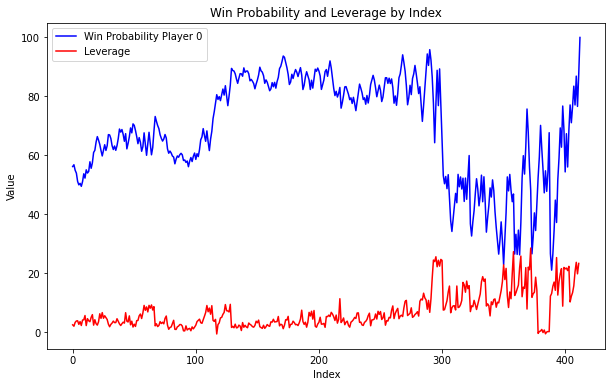

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Plot Win Probability and Leverage
plt.figure(figsize=(10, 6))

# Plot Win Probability
plt.plot(df.index, df['Win Probability Player 0'], label='Win Probability Nadal', color='blue')

# Plot Leverage
plt.plot(df.index, df['Leverage'], label='Leverage', color='red')

# Add title and labels
plt.title('Federer vs. Nadal 2008 Wimbledon Final Win Probabilty and Leverage Results')
plt.xlabel('Index')
plt.ylabel('Value')

# Add legend
plt.legend()

# Show the plot
plt.show()